# WeatherPy
----

## WeatherPy observable trends based on the data

1. The weather get warmer as you approach the equator.
2. There is no correlation between latitude and humidity, cloudiness, or wind speed.
3. The majority of cities in the both hemispheres locate in zone where the wind speed is less then 10 mph regardless of latitude.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from datetime import date
from scipy.stats import linregress



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities_data.csv"



## Generate Cities List

* Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# URL for GET requests to retrieve weather data
base_url = "http://api.openweathermap.org/data/2.5/weather?" 

units = "imperial"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


In [5]:
# set up lists to hold reponse info
lat =[]
lng = []
max_temp =[]
humidity = []
clouds = []
wind = []
country = []
wdate = []
exist_city =[]


print("-"*30)
print("Beginning Data Retrieval")
print("-"*30)

# To keep format of printed Log as suggested
set_num=1  # counter for Set number
i=1        # counter for record number

# Loop through the list of cities and perform a request for each of the cities
for city in cities:

    if i==50:
        set_num +=1
        i=1
    try:
        # Create search query, make request and store in json
        response = requests.get(query_url + city).json()

        exist_city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        wdate.append(response['dt'])


        # Include a print log of each city as it's being processed
        print(f"Processing Record {i} of Set {set_num} | {city}")

    except(KeyError, IndexError):
              print(f"City not found. Skipping...")
    i+=1

print("-"*30)
print("Data Retrieval Complete")
print("-"*30)

              

------------------------------
Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | saint anthony
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | bangui
Processing Record 4 of Set 1 | chicama
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | matamoros
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | istanbul
Processing Record 9 of Set 1 | koslan
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | yarmouth
Processing Record 12 of Set 1 | dwarka
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | lagoa
Processing Record 16 of Set 1 | san ramon
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | devils lake
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | zhigansk
Proce

Processing Record 8 of Set 5 | ahipara
Processing Record 9 of Set 5 | bud
Processing Record 10 of Set 5 | souillac
Processing Record 11 of Set 5 | port-gentil
City not found. Skipping...
Processing Record 13 of Set 5 | eydhafushi
Processing Record 14 of Set 5 | rockland
Processing Record 15 of Set 5 | bubaque
Processing Record 16 of Set 5 | chuy
Processing Record 17 of Set 5 | logrono
Processing Record 18 of Set 5 | sillod
Processing Record 19 of Set 5 | riyadh
Processing Record 20 of Set 5 | korla
Processing Record 21 of Set 5 | tabuk
Processing Record 22 of Set 5 | lamu
Processing Record 23 of Set 5 | vaitape
Processing Record 24 of Set 5 | axim
Processing Record 25 of Set 5 | grindavik
Processing Record 26 of Set 5 | sicuani
Processing Record 27 of Set 5 | vao
Processing Record 28 of Set 5 | upernavik
Processing Record 29 of Set 5 | filingue
Processing Record 30 of Set 5 | shizuishan
Processing Record 31 of Set 5 | anadyr
Processing Record 32 of Set 5 | bara
Processing Record 33 of 

Processing Record 18 of Set 9 | strezhevoy
Processing Record 19 of Set 9 | zharkent
Processing Record 20 of Set 9 | jizan
Processing Record 21 of Set 9 | magugu
Processing Record 22 of Set 9 | maumere
Processing Record 23 of Set 9 | luanda
Processing Record 24 of Set 9 | zhuanghe
Processing Record 25 of Set 9 | portland
Processing Record 26 of Set 9 | mopipi
Processing Record 27 of Set 9 | sabang
Processing Record 28 of Set 9 | aksay
Processing Record 29 of Set 9 | coihaique
Processing Record 30 of Set 9 | voyvozh
Processing Record 31 of Set 9 | grasse
Processing Record 32 of Set 9 | eyl
Processing Record 33 of Set 9 | huarmey
Processing Record 34 of Set 9 | rawson
Processing Record 35 of Set 9 | sao joao da barra
Processing Record 36 of Set 9 | poum
Processing Record 37 of Set 9 | hope
Processing Record 38 of Set 9 | paamiut
Processing Record 39 of Set 9 | lorengau
Processing Record 40 of Set 9 | aswan
Processing Record 41 of Set 9 | tuatapere
Processing Record 42 of Set 9 | sligo
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a Dataframe from received data
weather_dict = {
    "City": exist_city, 
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Country": country,
    "Weather Date": wdate
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Weather Date
0,Saint Anthony,45.0205,-93.2180,26.01,68,90,9.22,US,1611994745
1,Rikitea,-23.1203,-134.9692,79.38,75,7,11.23,PF,1611994745
2,Bangui,4.3612,18.5550,75.20,83,20,5.75,CF,1611994745
3,Chicama,-7.8447,-79.1469,72.21,69,98,4.65,PE,1611994642
4,Punta Arenas,-53.1500,-70.9167,44.60,76,40,5.75,CL,1611994745


In [7]:
# Remove missing values if exist
weather_data=weather_data.dropna()

# Export the city data into a .csv file
weather_data.to_csv(output_data_file, header=True)


In [8]:
# Generate descriptive statistics
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Weather Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,20.124050,17.488047,49.707818,71.520000,52.732727,8.717491,1.611995e+09
std,33.039260,91.076059,33.834217,21.040913,39.811846,5.817467,8.028422e+01
min,-54.800000,-175.200000,-49.670000,12.000000,0.000000,0.560000,1.611994e+09
25%,-6.954425,-61.106175,30.505000,62.000000,6.250000,4.230000,1.611995e+09
50%,22.912100,20.356900,60.955000,77.000000,56.000000,7.575000,1.611995e+09
75%,48.167925,96.941675,76.040000,87.000000,93.750000,11.802500,1.611995e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,28.770000,1.611995e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Get the indices of cities that have humidity over 100%
humidity_outliers = weather_data[weather_data['Humidity'] > 100].index
humidity_outliers

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

if weather_data['Humidity'].max() > 100:
    clean_city_data = weather_data.drop(humidity_outliers, inplace=False)
else:
    clean_city_data = weather_data
    

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
# get today's date
today=date.today().strftime('%m/%d/%Y')
today

'01/30/2021'

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


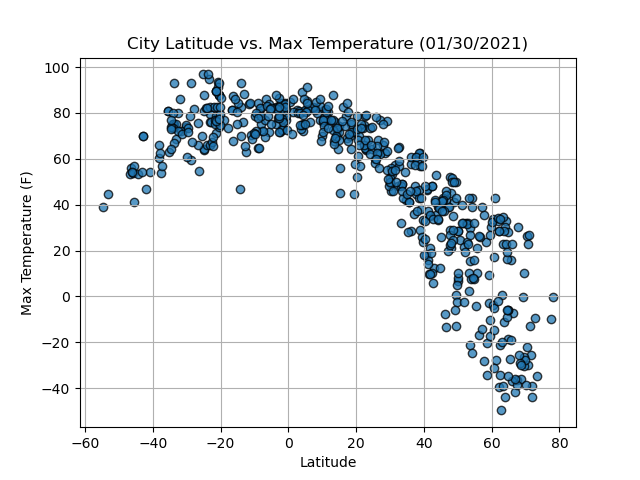

In [12]:
# Create a Scatter Plot for temperature vs latitude
x = clean_city_data['Lat']
y = clean_city_data['Max Temp']

fig1, ax1 =plt.subplots()

plt.scatter(x,y, edgecolors="black", alpha=0.75)

# set axis labels and title
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# add Grid
plt.grid()

# Save the figure
plt.savefig("../Images/MaxTempLat.png")

plt.show()

The plot is represent  relationship between Temperature and Latitude.
As expected, the weather becomes warmer as we approach the equator. 
This plot is also represent another well known fact about the seasons. Because of the Earth tilt, when it is winter in the North Hemisphere, the Southern Hemisphere has summer time. The data was collected at the winter time in the Northern Hemisphere. Looking at the plot, we can see that Northern Hemisphere's cities spread over the graphics in temperature range from -50F to 70F, while that majority of the Southern Hemisphere's cities fall into temperature range of 70-90F. 

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


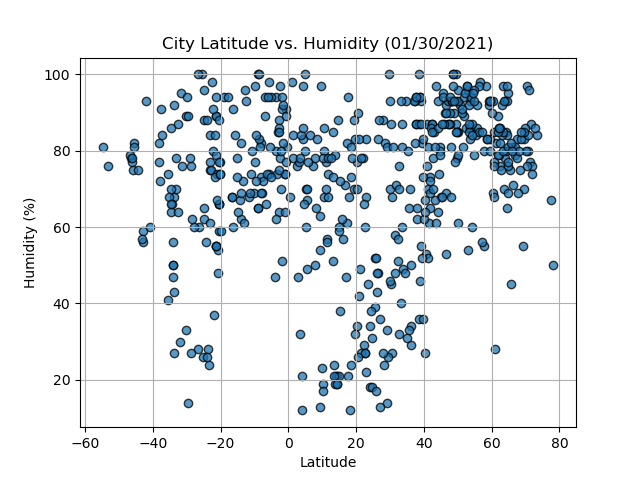

In [13]:
# Create a Scatter Plot for temperature vs latitude
x = clean_city_data['Lat']
y = clean_city_data['Humidity']

fig1, ax1 =plt.subplots()

plt.scatter(x,y, edgecolors="black", alpha=0.75)

# set axis labels and title
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# add Grid
plt.grid()

# Save the figure
plt.savefig("../Images/HumidLat.png")

plt.show()

There is no visible correlation between humidity and latitude.
However, the density of the scatter plot (the number of cities) in the areas with humidity 80% and more can be related to proximity to large water sources.

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


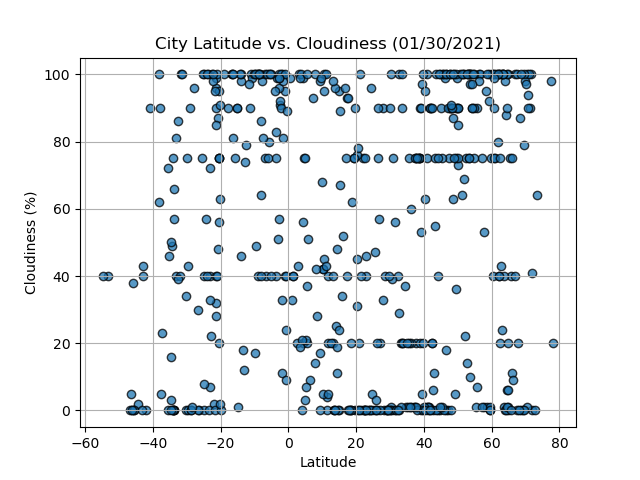

In [14]:
# Create a Scatter Plot for temperature vs latitude
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']

fig1, ax1 =plt.subplots()

plt.scatter(x,y, edgecolors="black", alpha=0.75)

# set axis labels and title
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# add Grid
plt.grid()

# Save the figure
plt.savefig("../Images/CloudsLat.png")

plt.show()

There is no correlation between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


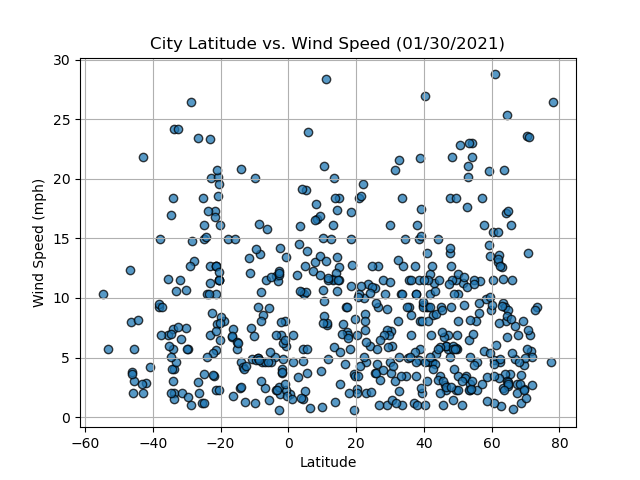

In [15]:
# Create a Scatter Plot for temperature vs latitude
x = clean_city_data['Lat']
y = clean_city_data['Wind Speed']

fig1, ax1 =plt.subplots()

plt.scatter(x,y, edgecolors="black", alpha=0.75)

# set axis labels and title
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# add Grid
plt.grid()

# Save the figure
plt.savefig("../Images/WindLat.png")

plt.show()

There is no correlation between latitude and wind speed.
Looking at the plot, we can see trend that the majority of cities located in zone where the wind speed is not more then 10 mph regardless of latitude.

## Linear Regression

* Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)

In [16]:
# Create Northern Hemisphere dataframe (greater than or equal to 0 degrees latitude)
north_hemisph = clean_city_data[(clean_city_data['Lat'] >= 0)]
north_hemisph.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Weather Date
0,Saint Anthony,45.0205,-93.2180,26.01,68,90,9.22,US,1611994745
2,Bangui,4.3612,18.5550,75.20,83,20,5.75,CF,1611994745
5,Matamoros,25.5333,-103.2500,60.01,52,0,3.67,MX,1611994745
7,Istanbul,41.0351,28.9833,46.40,87,75,13.80,TR,1611994714
8,Koslan,63.4564,48.8989,22.66,97,100,9.60,RU,1611994746


In [17]:
# Create Southern Hemisphere dataframe (less than 0 degrees latitude)
south_hemisph = clean_city_data[(clean_city_data['Lat'] < 0)]
south_hemisph.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Weather Date
1,Rikitea,-23.1203,-134.9692,79.38,75,7,11.23,PF,1611994745
3,Chicama,-7.8447,-79.1469,72.21,69,98,4.65,PE,1611994642
4,Punta Arenas,-53.1500,-70.9167,44.60,76,40,5.75,CL,1611994745
6,Mar del Plata,-38.0023,-57.5575,66.00,82,62,9.22,AR,1611994500
9,Ushuaia,-54.8000,-68.3000,39.20,81,40,10.36,AR,1611994746


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


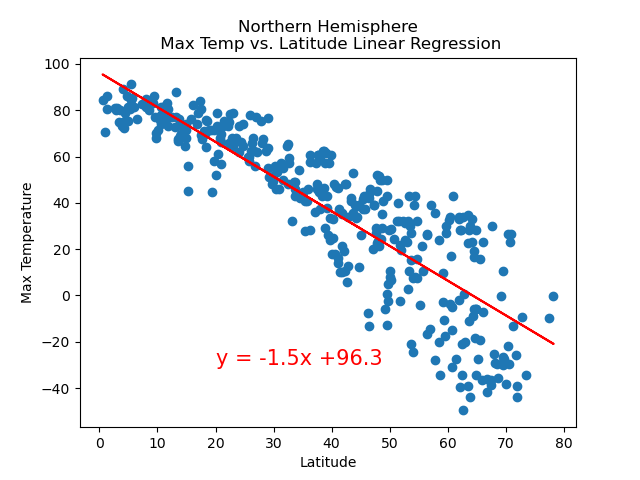

The r-value is: 0.7577384838864664


In [18]:
fig1, ax1 =plt.subplots()

x_values = north_hemisph['Lat']
y_values = north_hemisph['Max Temp']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere\n Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,-30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/NH_MaxTempLat_regr.png")

# Show plot
plt.show()

There is strong correlation between the lowest latitude and the highest temperature in the Northern Hemisphere (the r-value = 0.758)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


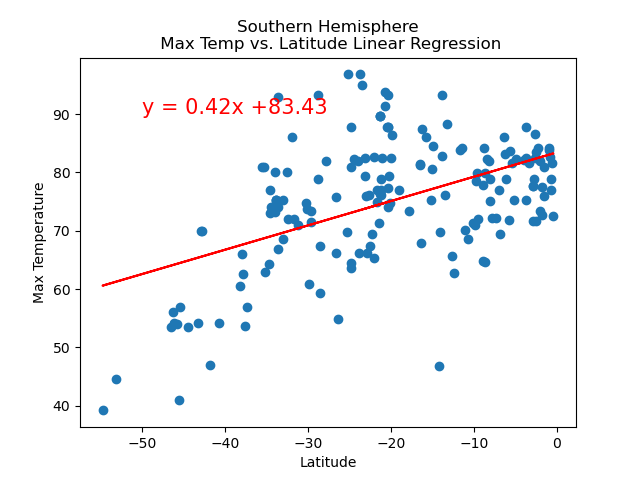

The r-value is: 0.2570057243259387


In [19]:
fig1, ax1 =plt.subplots()

x_values = south_hemisph['Lat']
y_values = south_hemisph['Max Temp']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere\n Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/SH_MaxTempLat_regr.png")

# Show plot
plt.show()

There is a weak relationship between temperature and latitude in the Southern Hemisphere (r-value = 0.257)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


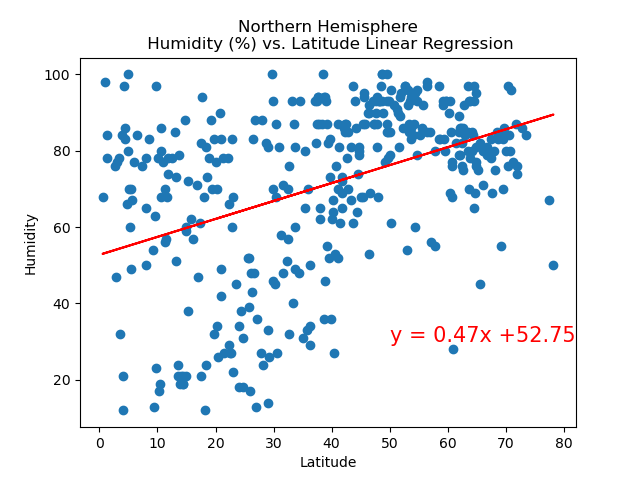

The r-value is: 0.1755071108438209


In [20]:
fig1, ax1 =plt.subplots()

x_values = north_hemisph['Lat']
y_values = north_hemisph['Humidity']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere\n Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/NH_HumidLat_regr.png")

# Show plot
plt.show()

There is no correlation between humidity and latitude in the Northern Hemisphere (r-value = 0.176)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


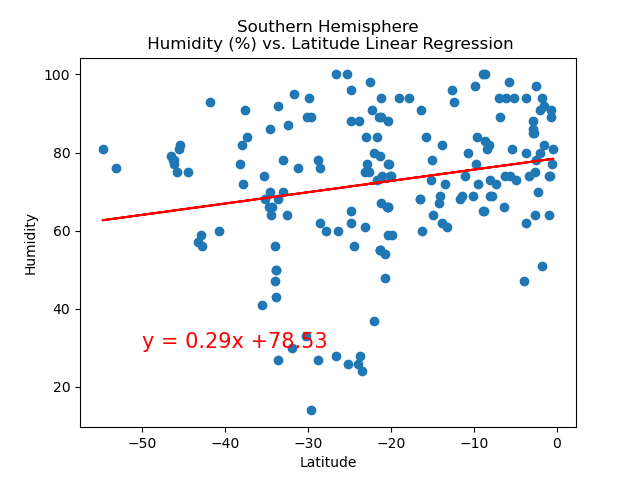

The r-value is: 0.048032995404306576


In [21]:
fig1, ax1 =plt.subplots()

x_values = south_hemisph['Lat']
y_values = south_hemisph['Humidity']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere\n Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/SH_HumidLat_regr.png")

# Show plot
plt.show()

There is no correlation between humidity and latitude in the Southern Hemisphere (r-value = 0.048)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


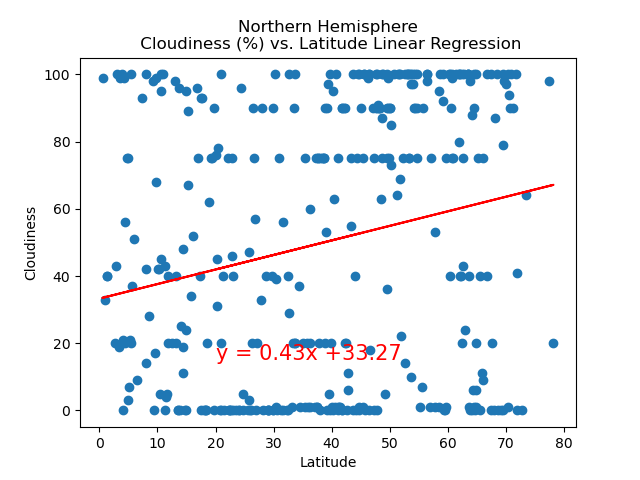

The r-value is: 0.04598007450952402


In [22]:
fig1, ax1 =plt.subplots()

x_values = north_hemisph['Lat']
y_values = north_hemisph['Cloudiness']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere\n Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/NH_CloudsLat_regr.png")

# Show plot
plt.show()

There is no correlation between cloudiness and latitude in the Northern Hemisphere (r-value = 0.046)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


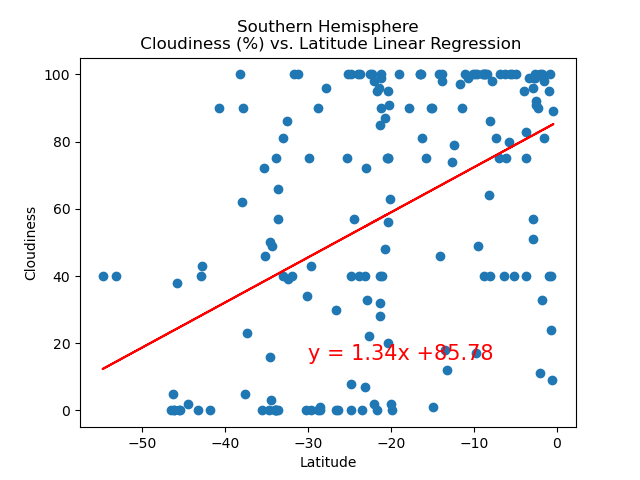

The r-value is: 0.2221686235769932


In [23]:
fig1, ax1 =plt.subplots()

x_values = south_hemisph['Lat']
y_values = south_hemisph['Cloudiness']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere\n Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/SH_CloudsLat_regr.png")

# Show plot
plt.show()

There is no correlation between cloudiness and latitude in the Southern Hemisphere (r-value = 0.222)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


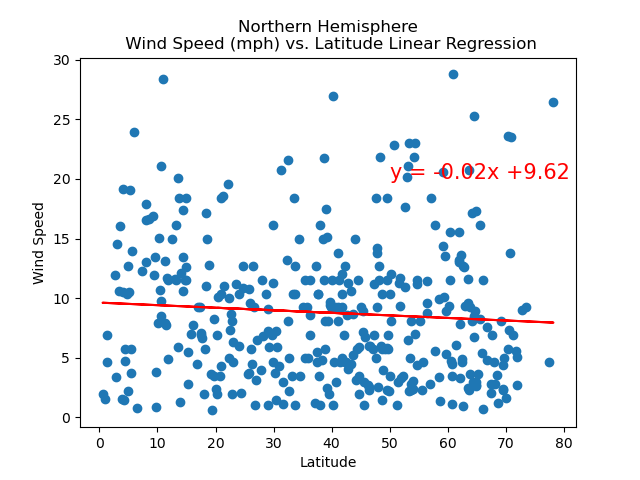

The r-value is: 0.005435656444942497


In [24]:
fig1, ax1 =plt.subplots()

x_values = north_hemisph['Lat']
y_values = north_hemisph['Wind Speed']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere\n Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/NH_WindLat_regr.png")

# Show plot
plt.show()

There is no any correlation between wind speed and latitude in the Northern Hemisphere (r-value = 0.005)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


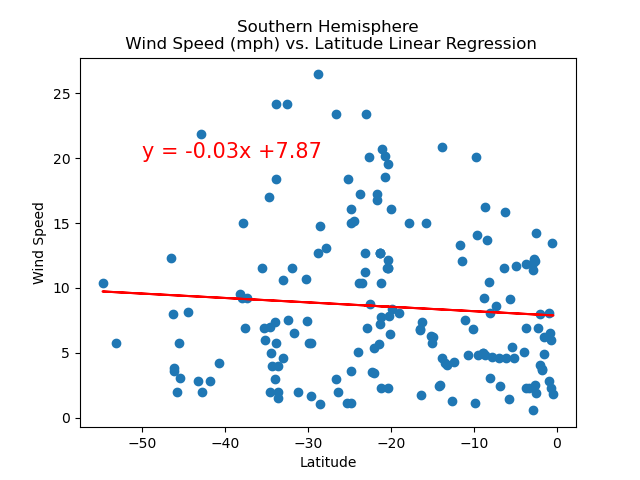

The r-value is: 0.00605153477051159


In [25]:
fig1, ax1 =plt.subplots()

x_values = south_hemisph['Lat']
y_values = south_hemisph['Wind Speed']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere\n Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/SH_WindLat_regr.png")

# Show plot
plt.show()

There is no correlation between wind and latitude in the Southern Hemisphere (r-value = 0.006)